In [3]:
import kagglehub
import pandas as pd

path = kagglehub.dataset_download("shafayathossainjahan/bangladesh-property-pricces")

df = pd.read_csv(path + '\\Bangladesh_property_prices.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Location,Price,Type,No. Beds,No. Baths,Area,Latitude,Longitude,Region,Sub-region
0,0,0.0,"Sector 10, Uttara, Dhaka",7500000,Apartment,3.0,3.0,1300.0,23.86846,90.39280,Uttara,Sector 10
1,1,1.0,"Section 11, Mirpur, Dhaka",7280000,Apartment,4.0,4.0,1456.0,23.81223,90.35967,Mirpur,Section 11
2,2,2.0,"Chowdhuripara, Khilgaon, Dhaka",13000000,Apartment,3.0,3.0,1550.0,23.75349,90.42469,Khilgaon,Chowdhuripara
3,3,3.0,"Road No 4, Banani, Dhaka",37000000,Apartment,3.0,3.0,2669.0,23.78855,90.40081,Banani,Road No 4
4,4,4.0,"South Banasree Project, Banasree, Dhaka",3600000,Apartment,2.0,2.0,835.0,23.76354,90.43180,Banasree,South Banasree Project


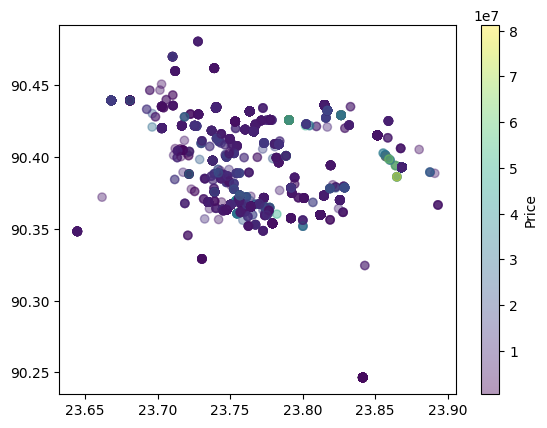

In [8]:
import matplotlib.pyplot as plt

location = df[['Latitude', 'Longitude']]
prices = df['Price']

plt.scatter(location.Latitude, location.Longitude, c=prices, cmap='viridis', alpha=0.4)

plt.colorbar(label='Price')

plt.show()

In [11]:
X = df.drop(['Unnamed: 0.1', 'Unnamed: 0', 'Price'], axis='columns')
X.head()

,Location,Type,No. Beds,No. Baths,Area,Latitude,Longitude,Region,Sub-region
0,"Sector 10, Uttara, Dhaka",Apartment,3.0,3.0,1300.0,23.86846,90.39280,Uttara,Sector 10
1,"Section 11, Mirpur, Dhaka",Apartment,4.0,4.0,1456.0,23.81223,90.35967,Mirpur,Section 11
2,"Chowdhuripara, Khilgaon, Dhaka",Apartment,3.0,3.0,1550.0,23.75349,90.42469,Khilgaon,Chowdhuripara
3,"Road No 4, Banani, Dhaka",Apartment,3.0,3.0,2669.0,23.78855,90.40081,Banani,Road No 4
4,"South Banasree Project, Banasree, Dhaka",Apartment,2.0,2.0,835.0,23.76354,90.43180,Banasree,South Banasree Project


In [12]:
y = df.Price
y

0        7500000
1        7280000
2       13000000
3       37000000
4        3600000
          ...   
4699     4950000
4700     4950000
4701     4950000
4702     4950000
4703     4950000
Name: Price, Length: 4704, dtype: int64

In [13]:
X.isna().sum()

Location        0
Type            0
No. Beds      204
No. Baths     204
Area            0
Latitude        0
Longitude       0
Region          0
Sub-region     24
dtype: int64

In [14]:
X.shape

(4704, 9)

In [18]:
X.dropna(subset=['No. Beds', 'No. Baths'])
X.isna().sum()

Location        0
Type            0
No. Beds      204
No. Baths     204
Area            0
Latitude        0
Longitude       0
Region          0
Sub-region     24
dtype: int64

In [19]:
X_encoded = pd.get_dummies(X, columns=['Location', 'Type', 'Region', 'Sub-region'])

X_encoded

,No. Beds,No. Baths,Area,Latitude,Longitude,"Location_1st Colony, Mirpur, Dhaka","Location_2nd Colony, Mirpur, Dhaka","Location_3rd Colony, Mirpur, Dhaka","Location_Aainusbag, Dakshin Khan, Dhaka","Location_Abdul Aziz Lane, Lalbagh, Dhaka",...,Sub-region_West Monipur,Sub-region_West Nakhalpara,Sub-region_West Rampura,Sub-region_West Shewrapara,Sub-region_Zafrabad,Sub-region_Zia Sarani Road,Sub-region_Zindabahar 2nd Lane,Sub-region_Zinzira,Sub-region_aziz Moholla,Sub-region_rayer bazar-sanker road
0,3.0,3.0,1300.0,23.86846,90.39280,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4.0,4.0,1456.0,23.81223,90.35967,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3.0,3.0,1550.0,23.75349,90.42469,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3.0,3.0,2669.0,23.78855,90.40081,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2.0,2.0,835.0,23.76354,90.43180,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4699,3.0,2.0,1100.0,23.81223,90.35967,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4700,3.0,2.0,1100.0,23.81223,90.35967,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4701,3.0,2.0,1100.0,23.81223,90.35967,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4702,3.0,2.0,1100.0,23.81223,90.35967,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.2)

In [22]:
from sklearn.svm import SVR

clf = SVR(gamma='auto', kernel='rbf', C=5)
SVR.fit(X_train, y_train)

AttributeError: 'DataFrame' object has no attribute '_validate_params'